In [1]:
#Importing packages needed
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the raw data
df_raw = pd.read_csv(r"data.txt", encoding="1252", sep="\t")

In [3]:
#Display 5 first rows 
df_raw.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [4]:
#Get shape of data set
df_raw.shape

(207, 12)

In [5]:
# Check the missing values in percentages(%)
np.round(df_raw.isnull().sum() / df_raw.shape[0] * 100, 2)

Kommun_code              0.0
Year                     0.0
Kommun_name              0.0
Revenue                  0.0
Employee                 0.0
Population               0.0
Population_University    0.0
Percent_University       0.0
Productivity             0.0
SalesIndex               0.0
Infrast                  0.0
Border                   0.0
dtype: float64

In [6]:
#Drops the columns 'Kommun_code' and 'Year' as we won't need this for this analysis
df_dropped = df_raw.drop(['Kommun_code', 'Year'], axis=1)

In [7]:
#Tuple with all the cities that already has an Ikea
ikea_stores = ("Borlänge", "Gävle", "Göteborg", "Haparanda", "Helsingborg" , "Jönköping", "Kalmar", "Karlstad", "Linköping", "Malmö", "Stockholm", "Sundsvall", "Uddevalla", "Umeå", "Uppsala", "Västerås", "Älmhult",  "Örebro")

df_dropped['Has_store'] = np.where(df_dropped['Kommun_name'].isin(ikea_stores), 1,0)

In [8]:
df_stores = df_dropped

Correlation Matric to check which factors we should go for in our analysis

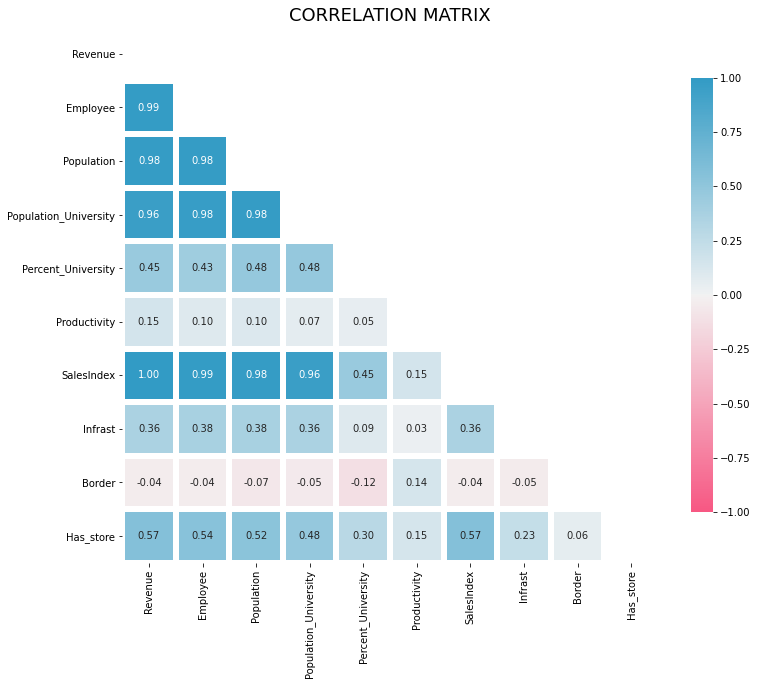

In [9]:
#Figure size.
fig, ax = plt.subplots(figsize=(12, 10))

# Color map.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

#Plot heatmap.
matrix = np.triu(df_stores.corr())
sns.heatmap(df_stores.corr(), annot=True, mask=matrix, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)



# Title
title = 'CORRELATION MATRIX'
plt.title(title, loc='center', fontsize=18)
plt.show()

Given the heatmap above, it is evident that highly correlated features are Population_university, Population, SalesIndex, Revenue, Employee. 
IKEA is a profit-driven business so Revenue and Population will be the predicting factors


In [10]:
df_stores.describe()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_store
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647,0.057971
std,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220,0.234255
min,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000,0.000000
25%,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000,0.000000
50%,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000,0.000000
75%,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000,0.000000
max,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000,1.000000


As we can see above we nee to scale our data before we cluster 

Remove Kommun_name

In [11]:
df = df_stores.loc[:,['Kommun_name','Population','Revenue','Has_store']]
df.head()

,Kommun_name,Population,Revenue,Has_store
0,Haparanda,10059,1078,1
1,Kalmar,62815,3790,1
2,Karlstad,85753,4560,1
3,Upplands Väsby,39289,1366,0
4,Vallentuna,30114,171,0


In [12]:
df1 = df.loc[:,['Population','Revenue']]
df1.head()

,Population,Revenue
0,10059,1078
1,62815,3790
2,85753,4560
3,39289,1366
4,30114,171


In [13]:
#Scaling data before clustering and elbow method
scaler = StandardScaler()
scaler.fit(df1)
X_scaled = scaler.transform(df1)

In [14]:
#Elbow method to find optimal number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

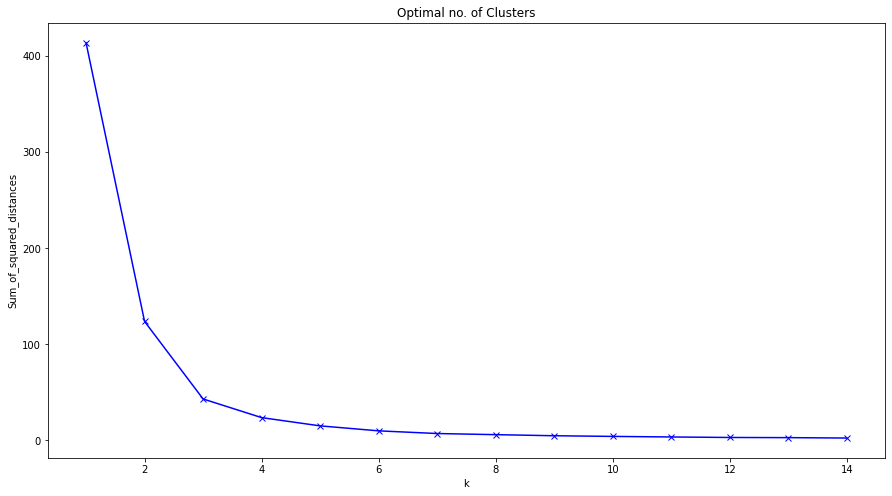

In [15]:
plt.figure(figsize=(15,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal no. of Clusters')
plt.show()

In [16]:
clustering = KMeans(n_clusters=3, max_iter=15,random_state=0, init='k-means++', n_init=10 ).fit(X_scaled)
clusters = clustering.labels_ 

In [17]:
#Centroids
print(clustering.cluster_centers_)

[[-0.20646781 -0.23063907]
 [12.1780642  11.8529708 ]
 [ 1.05829486  1.25513919]]


In [18]:
print(clustering.labels_ )

[0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


In [19]:
#Our clusters 
pd.Series(clustering.labels_ ).unique()

array([0, 2, 1], dtype=int32)

In [20]:
df['clusters'] = clusters 
df.head(15)

,Kommun_name,Population,Revenue,Has_store,clusters
0,Haparanda,10059,1078,1,0
1,Kalmar,62815,3790,1,2
2,Karlstad,85753,4560,1,2
3,Upplands Väsby,39289,1366,0,0
4,Vallentuna,30114,171,0,0
5,Österåker,39521,563,0,0
6,Värmdö,38301,920,0,0
7,Järfälla,66211,5119,0,2
8,Ekerö,25410,144,0,0
9,Huddinge,97453,7153,0,2


In [21]:
#Grouping the clusters 
df.groupby(['clusters']).agg([np.mean])

,Population,Revenue,Has_store
,mean,mean,mean
clusters,,,
0,20767.708791,411.758242,0.016484
1,847073.000000,32897.000000,1.000000
2,105153.625000,4406.083333,0.333333


In [22]:
clusters = df.groupby(['clusters'])

In [23]:
clusters1 = clusters.get_group(0)
clusters1.head(15)

,Kommun_name,Population,Revenue,Has_store,clusters
0,Haparanda,10059,1078,1,0
3,Upplands Väsby,39289,1366,0,0
4,Vallentuna,30114,171,0,0
5,Österåker,39521,563,0,0
6,Värmdö,38301,920,0,0
8,Ekerö,25410,144,0,0
10,Botkyrka,82608,1469,0,0
11,Salem,15391,27,0,0
12,Haninge,77054,1459,0,0
13,Tyresö,42947,480,0,0


In [24]:
#prediction based on parameters and preparing for analysis
pred1 = clusters1.loc[(clusters1.Population > 40000) & (clusters1.Revenue > 1000) ,:]
pred1

,Kommun_name,Population,Revenue,Has_store,clusters
10,Botkyrka,82608,1469,0,0
12,Haninge,77054,1459,0,0
23,Solna,68144,1491,0,0
26,Norrtälje,56080,1191,0,0
38,Nyköping,51644,1642,0,0
55,Motala,41955,1040,0,0
90,Gotland,57269,1542,0,0
92,Karlskrona,64032,2037,0,0
128,Hässleholm,50107,1243,0,0
133,Varberg,58084,1639,0,0


In [25]:
#Analyse and plot cluster 1 
clusters1 = clusters1.loc[:,['Kommun_name','Population','Revenue']]
clusters1 = clusters1.loc[0:60,:]
clusters1 = clusters1.set_index('Kommun_name')

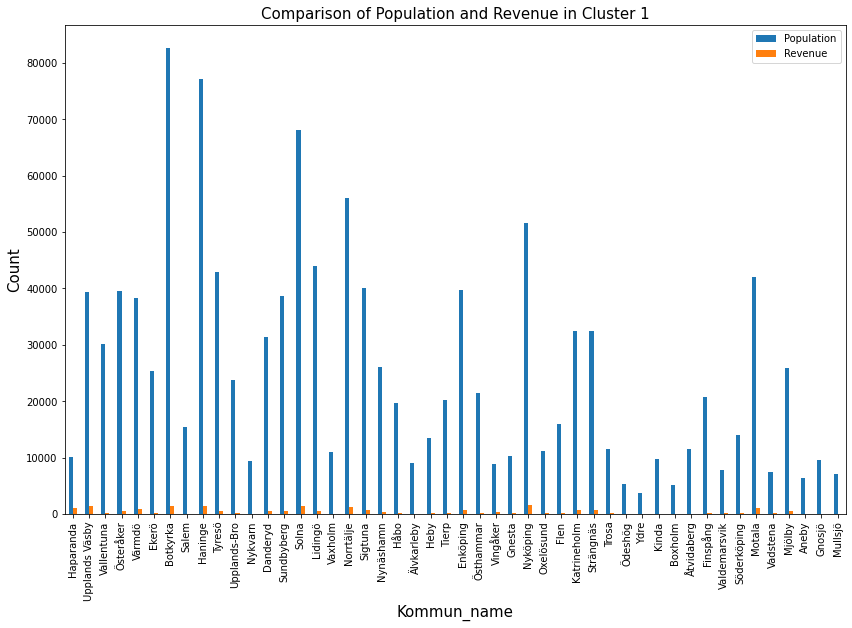

In [26]:
clusters1.plot(kind="bar", figsize = (14,9))
plt.title('Comparison of Population and Revenue in Cluster 1',fontsize=15)
plt.xlabel("Kommun_name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [27]:
clusters2 = clusters.get_group(1)
clusters2

,Kommun_name,Population,Revenue,Has_store,clusters
19,Stockholm,847073,32897,1,1


Stockholm is an outlier, so cluster 2 is exluded

In [28]:
#Prepare cluster 3 
clusters3 = clusters.get_group(2)
clusters3

,Kommun_name,Population,Revenue,Has_store,clusters
1,Kalmar,62815,3790,1,2
2,Karlstad,85753,4560,1,2
7,Järfälla,66211,5119,0,2
9,Huddinge,97453,7153,0,2
16,Täby,63789,3441,0,2
18,Sollentuna,64630,2393,0,2
20,Södertälje,86246,2191,0,2
21,Nacka,90108,3104,0,2
33,Uppsala,197787,7042,1,2
42,Eskilstuna,96311,2844,0,2


In [29]:
pred3 = clusters3.loc[(clusters3.Population > 50000) & (clusters3.Revenue > 2000) & (clusters3.Has_store == 0) ,:]
pred3

,Kommun_name,Population,Revenue,Has_store,clusters
7,Järfälla,66211,5119,0,2
9,Huddinge,97453,7153,0,2
16,Täby,63789,3441,0,2
18,Sollentuna,64630,2393,0,2
20,Södertälje,86246,2191,0,2
21,Nacka,90108,3104,0,2
42,Eskilstuna,96311,2844,0,2
53,Norrköping,130050,4438,0,2
77,Växjö,83005,3268,0,2
118,Lund,110488,3438,0,2


In [30]:
#Plot cluster three
clusters3 = clusters3.loc[:,['Kommun_name','Population','Revenue']]
clusters3 = clusters3.set_index('Kommun_name')

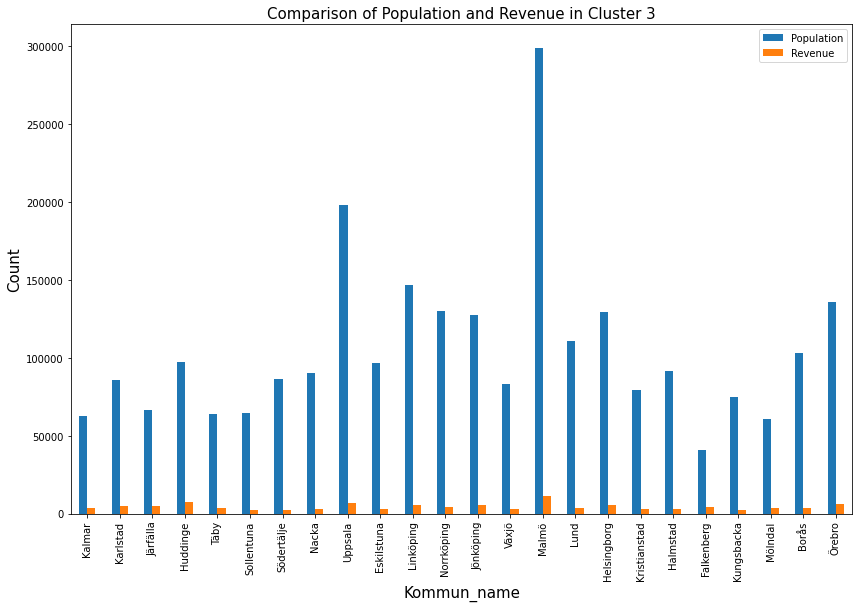

In [31]:
clusters3.plot(kind="bar", figsize = (14,9))
plt.title('Comparison of Population and Revenue in Cluster 3',fontsize=15)
plt.xlabel("Kommun_name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

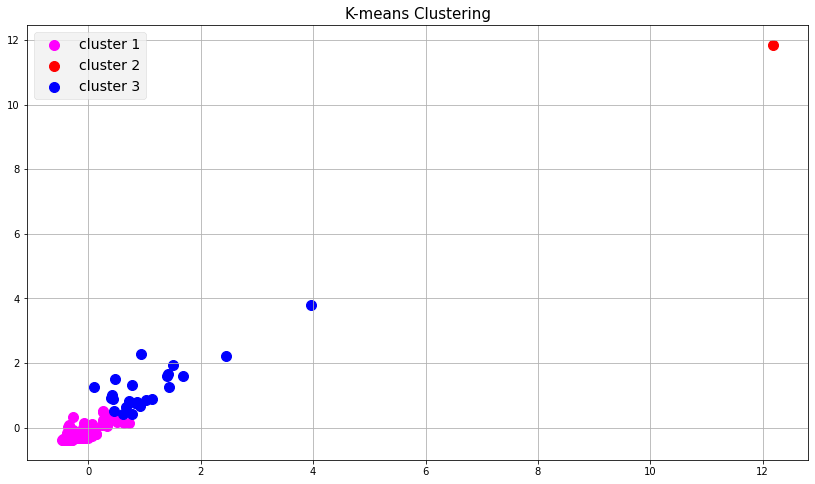

In [32]:
clustering = KMeans(n_clusters=3, max_iter=15,random_state=0, init='k-means++', n_init=10 )
y_means = clustering.fit_predict(X_scaled)

plt.figure(figsize = (14,8))
plt.scatter(X_scaled[y_means == 0, 0], X_scaled[y_means == 0, 1] , s = 100, c = 'magenta', label = 'cluster 1')
plt.scatter(X_scaled[y_means == 1, 0], X_scaled[y_means == 1, 1] , s = 100, c = 'red', label = 'cluster 2')
plt.scatter(X_scaled[y_means == 2, 0], X_scaled[y_means == 2, 1] , s = 100, c = 'blue', label = 'cluster 3')



plt.style.use('fivethirtyeight')
plt.title('K-means Clustering',fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [33]:
# Concluding order of suitable cities
Final_list_of_Cities = pd.concat([pred1, pred3], axis=0, ignore_index = True)
Final_list_of_Cities = Final_list_of_Cities.drop('Has_store', axis = 1)
Final_list_of_Cities = Final_list_of_Cities.sort_values(['Population','Revenue'], ascending = False, ignore_index = True)
Final_list_of_Cities

,Kommun_name,Population,Revenue,clusters
0,Norrköping,130050,4438,2
1,Lund,110488,3438,2
2,Borås,103294,3365,2
3,Huddinge,97453,7153,2
4,Eskilstuna,96311,2844,2
5,Halmstad,91800,3196,2
6,Nacka,90108,3104,2
7,Södertälje,86246,2191,2
8,Växjö,83005,3268,2
9,Botkyrka,82608,1469,0
